In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

# Make Popularity (craigslist Phoenix)

In [3]:
import pandas as pd
from pandas import Series, DataFrame

conn = sql.connect('/home/cha/Repositories/BestDealsFinder/test.db')
cursor = conn.cursor()

all_data = pd.read_sql_query("SELECT * from cars", conn)


In [4]:
all_data

,title,year,make,model,odometer,paintcolor,titlestatus,price
0,1999 Ford E350 converted Grooming shuttle bus ...,1999,ford,e350,167000,white,clean,"$13,500"
1,2008 Jeep Rubicon Unlimited and Matching Off R...,2008,jeep,wrangler,180000,yellow,clean,"$32,500"
2,1999 Lexus ES300 Coach Edition,1999,lexus,es300,147000,?,clean,"$5,450"
3,2017 Dodge Challenger SXT Plus,2017,dodge,challenger,66000,blue,clean,"$23,950"
4,Ford F150 Lariat 2019,2019,ford,f-150,10150,silver,clean,"$49,500"
...,...,...,...,...,...,...,...,...
111,2014 Nissan Titan only 77k miles,2014,nissan,titan,77000,?,clean,"$23,500"
112,1999 Chevy Tahoe 4DR 4WD,1999,chevrolet,tahoe,171500,?,clean,"$5,900"
113,2019 Colorado ZR2,2019,chevrolet,colorado,30000,grey,clean,"$41,000"
114,Mercedes-Benz 2021 E450 Cabriolet,2021,mercedes-benz,e450,7499,silver,clean,"$79,499"


Making a dictionary, with the key being the make and value the occurences.

In [5]:
from collections import Counter
def get_make_count(data: DataFrame):
    try:
        dicc = Counter(data.make)
    except:
        return {}
    return dicc


get_make_count(all_data)

Counter({'ford': 19,
         'jeep': 3,
         'lexus': 4,
         'dodge': 10,
         'buick': 1,
         'infiniti': 1,
         'gm': 4,
         '?': 9,
         'ram': 2,
         'bmw': 4,
         'tesla': 4,
         'chevrolet': 20,
         'honda': 6,
         'acura': 2,
         'land rover': 3,
         'toyota': 6,
         'hyundai': 2,
         'audi': 2,
         'lincoln': 5,
         'porsche': 1,
         'chrysler': 1,
         'nissan': 3,
         'mitsubishi': 1,
         'pontiac': 1,
         'subaru': 1,
         'mercedes-benz': 1})

dict_keys(['ford', 'jeep', 'lexus', 'dodge', 'buick', 'infiniti', 'gm', '?', 'ram', 'bmw', 'tesla', 'chevrolet', 'honda', 'acura', 'land rover', 'toyota', 'hyundai', 'audi', 'lincoln', 'porsche', 'chrysler', 'nissan', 'mitsubishi', 'pontiac', 'subaru', 'mercedes-benz'])   dict_values([19, 3, 4, 10, 1, 1, 4, 9, 2, 4, 4, 20, 6, 2, 3, 6, 2, 2, 5, 1, 1, 3, 1, 1, 1, 1])


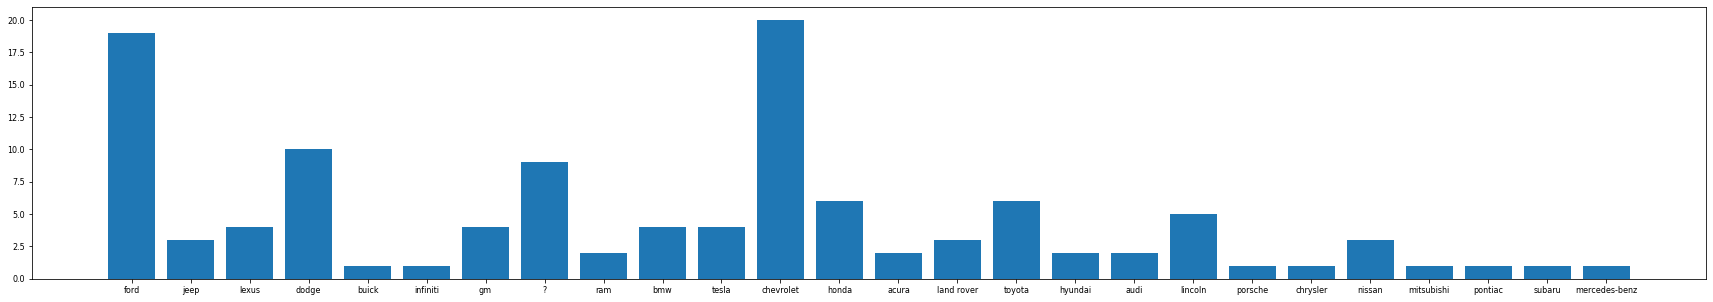

In [6]:
make_count = get_make_count(all_data)

plt.figure(figsize=(30, 5))
plt.rcParams.update({'font.size': 8})
bar = plt.bar(make_count.keys(), make_count.values()) 

In [ ]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 30, 'text.color': '#ffffff'})
plt.pie(make_count.values(), labels=make_count.keys())

In [8]:
#regex stuff
import re
string = " Toyota2015 Corolla S"
d = re.findall('(\d{4})', string)
print(d)
a = re.match('(\d{4})', string)
print(a)

['2015']
None


# Average Price by Make 

<BarContainer object of 26 artists>

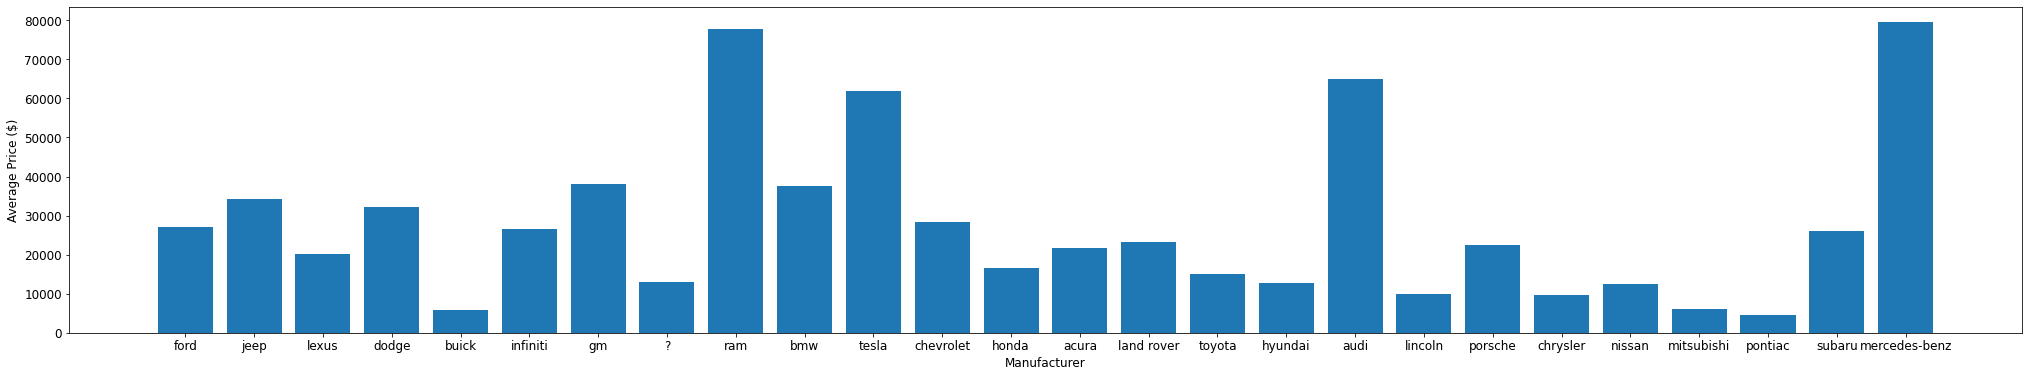

In [18]:
from importlib import reload
plt=reload(plt)

total_price = {}
for row in all_data.iloc:
    curr_price = int(row['price'].replace('$', '').replace(',', ''))
    if row['make'] not in total_price:
        total_price[row['make']] = curr_price
    else:
        total_price[row['make']] += curr_price

avg_price = {}
for (k,v), (k2,v2) in zip(total_price.items(), make_count.items()):
    avg_price[k] = round(v / v2, 2)

plt.figure(figsize=(35, 6))
plt.rcParams.update({'font.size': 12})
plt.xlabel('Manufacturer')
plt.ylabel('Average Price ($)')

plt.bar(avg_price.keys(), avg_price.values())